<a href="https://colab.research.google.com/github/franz6ko/deep-learning/blob/main/Ejercicios_para_entregar_a_la_mitad_del_cursado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 1 - Stochastic Gradient Descent

a) Implementar en Python un algoritmo basado en Stochastic Gradient Descent
para encontrar numéricamente el mínimo de 𝑦 = (𝑥 − 2)**2 + 3. ¿Cuál es
el mínimo valor que encontró el algoritmo y para qué valor de x? ¿En qué
momento detuviste la búsqueda y por qué? ¿Cómo inicializamos los valores
random del algoritmo y cómo afectan la convergencia? ¿Cuáles son los hiper
parámetros del algoritmo?


In [8]:
def f(x):
  return (x - 2)**2 + 3

def fp(x):
  return 2*(x - 2)

Min: 1.9955791235866507


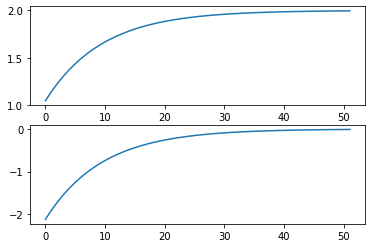

In [47]:
alpha = 0.05
tol = 0.01

x = np.random.rand()
g = 1

hist_x = []
hist_g = []

while abs(g) > tol:
  g = fp(x)
  x = x - alpha * g
  hist_x.append(x)
  hist_g.append(g)

fig, axs = plt.subplots(2)
axs[0].plot(hist_x)
axs[1].plot(hist_g)

print("Min: " + str(x))

Se detuvo la búsqueda aplicando una tolerancia al valor absoluto del gradiente. Cuando el mismo es lo suficientemente chico, consideramos que estamos muy cerca del mínimo de la función y detenemos el bucle.

El único valor que se inicializa aleatoreamente es un valor inicial de x. Para ello usamos la funcion np.random.rand() que devuelve valores entre [0,1).

Los hiperparámetros del algoritmo son el alpha y el valor de tolerancia para la detención.

b) Agregar al algoritmo del punto (a) un momento de primer orden. ¿Cuáles son
los hiper parámetros del algoritmo?

Min: 1.9980161434733474


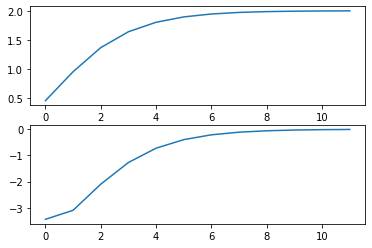

In [44]:
alpha = 0.05
tol = 0.01
sigma = 0.1

x = np.random.rand()
g = 1
gb = 0

hist_x = []
hist_g = []

while abs(g) > tol:
  g = fp(x)
  x = x - alpha * g - sigma * gb
  gb = g
  hist_x.append(x)
  hist_g.append(g)

fig, axs = plt.subplots(2)
axs[0].plot(hist_x)
axs[1].plot(hist_g)

print("Min: " + str(x))

Los hiperparámetros del algoritmo ahora son: aplha, la tolerancia y sigma.

c) Agregar al algoritmo del punto (b) un momento de segundo orden. ¿Cuáles
son los hiper parámetros del algoritmo?

Min: 2.006691069571183


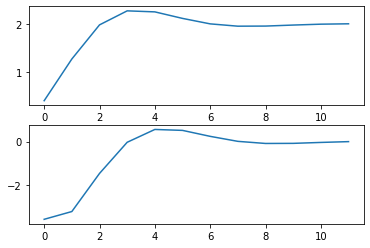

In [45]:
alpha = 0.05
tol = 0.01
sigma = 0.1
epsilon = 0.1

x = np.random.rand()
g = 1
gb = 0
gbb = 0

hist_x = []
hist_g = []

while abs(g) > tol:
  g = fp(x)
  x = x - alpha * g - sigma * gb - epsilon * gbb
  gb = g
  gbb = gb
  hist_x.append(x)
  hist_g.append(g)

fig, axs = plt.subplots(2)
axs[0].plot(hist_x)
axs[1].plot(hist_g)

print("Min: " + str(x))

Los hiperparámetros del algoritmo ahora son: aplha, la tolerancia, sigma y epsilon.

d)  Definir los mismos valores random iniciales para los tres optimizadores (a),
(b) y (c). Para todos los casos graficar los gradientes en función de las
iteraciones. ¿Qué algoritmo converge más rápido?


SGD exited on epoch nº 623
SGD w/1st order momentum exited on epoch nº 37
SGD w/2nd order momentum exited on epoch nº 24


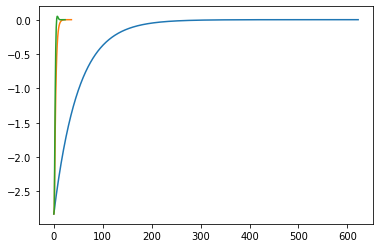

In [63]:
x = np.random.rand()

xa = x
xb = x
xc = x
hista = []
histb = []
histc = []

alpha = 0.01
tol = 1e-5
sigma = 0.1
epsilon = 0.05

# SGD
g = 1
while abs(g) > tol:
  g = fp(xa)
  xa = xa - alpha * g
  hista.append(g)

# SGD w/1st order momentum
g = 1
gb = 0
while abs(g) > tol:
  g = fp(xb)
  xb = xb - alpha * g - sigma * gb
  gb = g
  histb.append(g)

# SGD w/2nd order momentum
g = 1
gb = 0
gbb = 0
while abs(g) > tol:
  g = fp(xc)
  xc = xc - alpha * g - sigma * gb - epsilon * gbb
  gb = g
  gbb = gb
  histc.append(g)

fig, ax = plt.subplots(1)
ax.plot(hista)
ax.plot(histb)
ax.plot(histc)

print("SGD exited on epoch nº " + str(len(hista)))
print("SGD w/1st order momentum exited on epoch nº " + str(len(histb)))
print("SGD w/2nd order momentum exited on epoch nº " + str(len(histc)))

Vemos que el SGD con momento de segundo orden converge más rápido.